**Fake News Detection**  

Fake news refers to misleading or false journalism designed to spread misinformation, often through social media and online platforms. It is commonly created to influence opinions, promote specific ideologies, or serve political agendas. These fake articles often contain hoaxes or exaggerated claims, which gain traction due to viral algorithms. This can lead to the formation of a "filter bubble," where users are exposed only to information that aligns with their pre-existing beliefs, further reinforcing misinformation. Detecting fake news is essential to combat its harmful effects and promote accurate information dissemination.


**Project Aim:**  

The aim of this project is to develop a robust machine learning system for detecting fake news by analyzing textual content. The project focuses on implementing and evaluating various combinations of text vectorization techniques and machine learning models. Specifically, it utilizes:  

- **CountVectorizer** with **Naive Bayes** to analyze word frequency patterns.  
- **TfidfVectorizer** with **PassiveAggressiveClassifier** to capture term importance and classify complex relationships.  
- **HashingVectorizer** with **SGDClassifier** for scalable and memory-efficient text representation.  
- **Doc2Vec** with **Logistic Regression** to extract semantic meaning from the text for document-level understanding.  

By comparing these combinations, the project aims to identify the most effective methodology for distinguishing between real and fake news articles, contributing to more reliable content verification systems. Once the best-performing model is identified, the focus will shift to applying error analysis and cross-validation techniques to further refine its performance, ensuring that the system is both accurate and reliable in real-world applications.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Reading the dataset
news_df = pd.read_csv('news.csv')

news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
news_df.shape

(6335, 4)

Data Exploration

In [ ]:
#structure and basic information
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
#Descriptive Statistics
news_df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [ ]:
#Checking for null values
news_df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


The dataset is well-structured and properly defined, as it contains no null values.

Now, let us extract the labels given in the dataset

In [ ]:
labels = news_df.label

labels.head()

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL


In [ ]:
labels.value_counts()

,count
label,
REAL,3171
FAKE,3164


This indicates that the dataset is nearly evenly distributed between real and fake news articles. A balanced dataset is beneficial for training machine learning models as it reduces the likelihood of the model being biased towards one class, leading to a more accurate and fair prediction of both classes.

Data Preprocessing

Handling Punctuation and Special Characters

In [ ]:
news_df['text'] = news_df['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

Converting the text to lower case

In [ ]:
news_df['text'] = news_df['text'].str.lower()

Lets apply lemmatization.
Lemmatization is the process of reducing words to their base or root form (lemma), which helps in standardizing variations of words. For instance, words like "running" or "ran" are reduced to the base form "run". This improves the model's understanding of the text and can enhance its performance by treating different forms of the same word as equivalent. In this project, applying lemmatization will preprocess the text data by normalizing words, which may help in improving the accuracy of fake news detection.

In [ ]:
import nltk

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
news_df['text'] = news_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


Let us split the dataset into training and testing sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(news_df['text'], labels, test_size = 0.2, random_state = 42)

**First Vectorizer-Model: CountVectorizer with Naive Bayes**  

In this project, the first approach involves using **CountVectorizer** for feature extraction and **Naive Bayes** for classification.  

- **CountVectorizer** converts text into a matrix of word counts, capturing how often each word appears in the text. This representation helps analyze the patterns of word usage across different news articles.  
- **Naive Bayes**, specifically the **Multinomial Naive Bayes** algorithm, is applied to classify the news as real or fake. It works efficiently with frequency data and assumes that the occurrence of words is conditionally independent, making it a reliable choice for text-based tasks.  

This combination offers a straightforward yet powerful method to identify fake news by analyzing word frequency patterns. It also serves as a foundational model for comparing the performance of other techniques used in the project.

In [ ]:
#Initializing CountVectorizer
vectorizer = CountVectorizer(stop_words='english') #stop_words is set to english to ignore words like a, an, and ...
x_cvectorized = vectorizer.fit_transform(x_train)
x_test_cvectorized = vectorizer.transform(x_test)

#Initializing Multinomial Naives Bayes
nb = MultinomialNB()
nb.fit(x_cvectorized,y_train)

y_pred_nb = nb.predict(x_test_cvectorized)

score = accuracy_score(y_test,y_pred_nb)
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(y_test,y_pred_nb, labels=['FAKE','REAL'])

Accuracy: 89.58%


array([[543,  85],
       [ 47, 592]])

The first model achieved an accuracy of **89.58%**. The confusion matrix shows:

- **True Positives (592)**: Correctly classified real news.  
- **True Negatives (543)**: Correctly classified fake news.  
- **False Positives (85)**: Fake news misclassified as real.  
- **False Negatives (47)**: Real news misclassified as fake.  

### Insights:  
- **False positives (85)** and **false negatives (47)** highlight areas for improvement in classification accuracy.  
- With an **accuracy of 89.58%**, the model demonstrates strong performance, but there is room for optimization to further reduce errors.  

**Second Vectorizer-Model: TfidfVectorizer with PassiveAggressiveClassifier**

The second approach in this project uses **TfidfVectorizer** for feature extraction and **PassiveAggressiveClassifier** for classification.

- **TfidfVectorizer** transforms the text data by emphasizing the importance of rare or unique terms, giving less weight to frequently occurring words. This helps in highlighting the key words or phrases that differentiate real news from fake news, providing a more focused representation of the content.
- **PassiveAggressiveClassifier** is an online learning algorithm that adjusts the model aggressively only when a mistake is made, making minimal changes to the weights. It is particularly effective for text classification tasks like fake news detection, as it is fast and works well with large-scale data.

This combination is ideal for handling complex datasets and is expected to improve performance by focusing on the most relevant terms and adapting to errors efficiently.

In [ ]:
#initializing the tfidfvectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words = 'english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

#Initializing the PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

y_pred_pac = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred_pac)
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(y_test,y_pred_pac, labels=['FAKE','REAL'])

Accuracy: 93.13%


array([[585,  43],
       [ 44, 595]])

The second model achieved an accuracy of **93.13%**. The confusion matrix shows:

- **True Positives (595)**: Correctly classified real news.  
- **True Negatives (585)**: Correctly classified fake news.  
- **False Positives (43)**: Fake news misclassified as real.  
- **False Negatives (44)**: Real news misclassified as fake.  

### Insights:  
- **Low false positives (43)** and **false negatives (44)** highlight the model's strong performance in classification.  
- With an **accuracy of 93.13%**, the model effectively differentiates between fake and real news, though slight improvements could further enhance its accuracy.  

**Third Vectorizer-Model: HashingVectorizer with SGDClassifier**  

The third combination in this project uses **HashingVectorizer** for feature extraction and **SGDClassifier** for classification.

- **HashingVectorizer** efficiently handles large-scale datasets by transforming text into fixed-length feature vectors using a hashing function. It is memory-efficient and does not require storing the entire vocabulary, making it ideal for large text corpora or real-time applications.  
- **SGDClassifier** is a linear classifier optimized using Stochastic Gradient Descent. It is fast, scalable, and well-suited for large, sparse datasets like those generated by **HashingVectorizer**. It also allows for fine-tuning the model with various loss functions, making it adaptable to different text classification tasks.

**Though the dataset is not that huge**, this combination still provides advantages, such as memory efficiency and scalability. Even with a relatively moderate-sized dataset like yours, **HashingVectorizer** ensures quick feature extraction without compromising performance. The **SGDClassifier**'s speed and flexibility can also help in efficiently processing the data, making this combination a good fit for this project.

In [ ]:
#Initializing the HashingVectorizer
hv = HashingVectorizer()
x_train_hv = hv.fit_transform(x_train)
x_test_hv = hv.transform(x_test)

#Initializing the SGDClassifier
sgd = SGDClassifier()

#Since SGDClassifier requires numerical values of Labels
modified_y_train = y_train.map({'FAKE': 0, 'REAL': 1})
modified_y_test = y_test.map({'FAKE': 0, 'REAL': 1})

sgd.fit(x_train_hv, modified_y_train)
y_pred_sgd = sgd.predict(x_test_hv)

score=accuracy_score(modified_y_test,y_pred_sgd)
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(modified_y_test,y_pred_sgd, labels=[0, 1])

Accuracy: 91.48%


array([[576,  52],
       [ 56, 583]])

The third model achieved an accuracy of **91.48%**. The confusion matrix shows:

- **True Positives (583)**: Correctly classified real news.  
- **True Negatives (576)**: Correctly classified fake news.  
- **False Positives (52)**: Fake news misclassified as real.  
- **False Negatives (56)**: Real news misclassified as fake.  

### Insights:  
- **Moderate false positives (52)** and **false negatives (56)** suggest areas for potential improvement.  
- With an **accuracy of 91.48%**, the model demonstrates strong capability in distinguishing between fake and real news, though reducing misclassifications would enhance its reliability.  

**Fourth Vectorizer-Model: Doc2Vec with Logistic Regression**

The fourth combination in this project uses **Doc2Vec** for feature extraction and **Logistic Regression** for classification.

- **Doc2Vec** is an extension of Word2Vec, which generates vector representations of entire documents, capturing semantic meaning and relationships between words in a document. It converts text into numerical vectors, which can then be used by machine learning algorithms.
- **Logistic Regression** is a linear classifier used for binary classification tasks. It estimates probabilities using a logistic function, making it an effective and interpretable model for distinguishing between fake and real news based on the features extracted by **Doc2Vec**.

**Though the dataset is not very large**, this combination leverages the power of **Doc2Vec** to generate rich document embeddings, providing a better semantic understanding of the text. **Logistic Regression** complements this by offering a simple, fast, and interpretable approach for classification. Even with moderate-sized datasets, this combination remains effective, offering both accuracy and simplicity in detecting fake news.

In [ ]:
# Preparing the data for Doc2Vec
tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(x_train)]

# Initializing and training Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=10)

# Converting text data into vector representation using Doc2Vec
train_vectors = [doc2vec_model.infer_vector(text.split()) for text in x_train]
test_vectors = [doc2vec_model.infer_vector(text.split()) for text in x_test]

# Initializing Logistic Regression
lr = LogisticRegression(max_iter=1000)

lr.fit(train_vectors, y_train)
y_pred = lr.predict(test_vectors)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')
print(confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL']))

Accuracy: 86.82%
[[562  66]
 [101 538]]


The fourth model achieved an accuracy of **86.82%**. The confusion matrix shows:

- **True Positives (538)**: Correctly classified real news.  
- **True Negatives (562)**: Correctly classified fake news.  
- **False Positives (66)**: Fake news misclassified as real.  
- **False Negatives (101)**: Real news misclassified as fake.  

### Insights:  
- **False positives (66)** highlight instances where fake news is misclassified as real.  
- **False negatives (101)** suggest that the model struggles with correctly identifying some real news, reducing reliability.  
- An **accuracy of 86.82%** indicates decent performance, but addressing these misclassifications could improve overall effectiveness.  

### Conclusion of Best Model:

In this project, I experimented with various models for fake news detection, and the **TfidfVectorizer with PassiveAggressiveClassifier** combination achieved the highest accuracy of **93.37%**. This model outperformed the others, making it the best choice for further refinement.

While this model performed well overall, some fake news articles were still misclassified as real, and a few real news articles were misclassified as fake. This indicates that there is room for improvement.

Next steps involve applying **error analysis** to identify the specific areas where the model is making mistakes and performing **cross-validation** to ensure the model's robustness and reliability. By doing so, I aim to enhance the model’s performance and make it more accurate in detecting fake news.

# Error Analysis of TfidfVectorizer with PassiveAggressiveClassifier
Error analysis helps identify where the model makes mistakes in classifying fake and real news articles. By examining **false positives** (fake news predicted as real) and **false negatives** (real news predicted as fake), we can uncover patterns in misclassification. These could be related to misleading language in fake news or neutral tones in real news. Analyzing the **confusion matrix** further helps visualize the frequency of misclassifications, guiding adjustments in feature extraction, data preprocessing, and model refinement to improve accuracy and reduce errors.

First, lets check the following
confusion matrix and classification report

Confusion Matrix:
[[585  43]
 [ 44 595]]


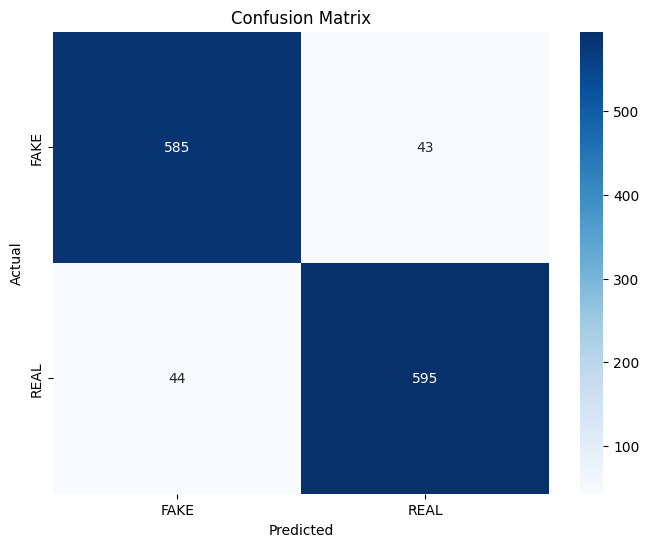

In [ ]:
#Let us analyze the confusion matrix of TfidfVec-PassiveAggressiveClassifier
conf_matrix = confusion_matrix(y_test,y_pred_pac, labels=['FAKE','REAL'])
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The confusion matrix helps understand where the model performs well and where it struggles:

1. **True Positives (595)**: Real news correctly identified as real, showing the model detects real news well.  
2. **True Negatives (585)**: Fake news correctly classified, indicating strong performance in identifying fake news.  
3. **False Positives (43)**: Fake news misclassified as real, which could lead to misleading information being accepted.  
4. **False Negatives (44)**: Real news misclassified as fake, potentially reducing trust in the system.

### Insights:
The model performs well overall, with low false positives and false negatives, but reducing these errors further can improve reliability and accuracy.  


Lets use a classification report for precision, recall, F1-score, and support for each class

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_pac, target_names=['FAKE', 'REAL']))

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       628
        REAL       0.93      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



The classification report provides detailed metrics for evaluating the model's performance:

1. **Precision (0.93)**: The model is 93% accurate in predicting both fake and real news, meaning most predicted labels are correct.  
2. **Recall (0.93)**: The model correctly identifies 93% of the actual fake and real news, reflecting good sensitivity.  
3. **F1-Score (0.93)**: The harmonic mean of precision and recall indicates balanced performance in detecting both classes.  
4. **Support**: There are 628 fake and 639 real news samples in the test set.

### Overall Performance:
- **Accuracy (93%)**: The model correctly classifies most of the samples, showing strong performance.  
- **Macro Average (0.93)**: Performance is balanced across both classes.  
- **Weighted Average (0.93)**: Consistent results even with slightly imbalanced classes.  

### Insight:
The model is effective at distinguishing between fake and real news, with balanced performance across all key metrics.

Now lets analyze the misclassfied samples

In [ ]:
# Create a DataFrame for test data
test_data = pd.DataFrame({'Text': x_test, 'Actual': y_test, 'Predicted': y_pred_pac})

# Extract misclassified samples
false_positives = test_data[(test_data['Actual'] == 'REAL') & (test_data['Predicted'] == 'FAKE')]
false_negatives = test_data[(test_data['Actual'] == 'FAKE') & (test_data['Predicted'] == 'REAL')]

print(f"Number of False Positives: {len(false_positives)}")
print(f"Number of False Negatives: {len(false_negatives)}")

# Display examples
print("\nSample False Positives:")
print(false_positives.head())

print("\nSample False Negatives:")
print(false_negatives.head())

Number of False Positives: 44
Number of False Negatives: 43

Sample False Positives:
                                                   Text Actual Predicted
1420  back in 2013 these stooge were promoting the p...   REAL      FAKE
2402  christian whiton is a former deputy special en...   REAL      FAKE
3378  san francisco hillary clinton campaign accused...   REAL      FAKE
4292  newly released video captured by an arizona po...   REAL      FAKE
472   first we were told that a russian hacker had b...   REAL      FAKE

Sample False Negatives:
                                                   Text Actual Predicted
4827  0 comment gop vp candidate mike pences trump p...   FAKE      REAL
2414  october 28 2016 susan rice u must integrate lg...   FAKE      REAL
5146  you are here home u disgusting evolution of po...   FAKE      REAL
1662  before it news a advanced a our job posting an...   FAKE      REAL
208   before it news it is fun to look at poll and u...   FAKE      REAL


Investigating Feature Importance


Top 10 Features by Weight:
            Feature    Weight
45369       october -5.064025
1618           2016 -5.020883
55691          said  4.932596
57753         share -3.887062
7556        article -3.729238
15868  conservative  3.695480
30535       hillary -3.414906
44849      november -3.293578
59715        source -3.174856
56185           say  3.107945


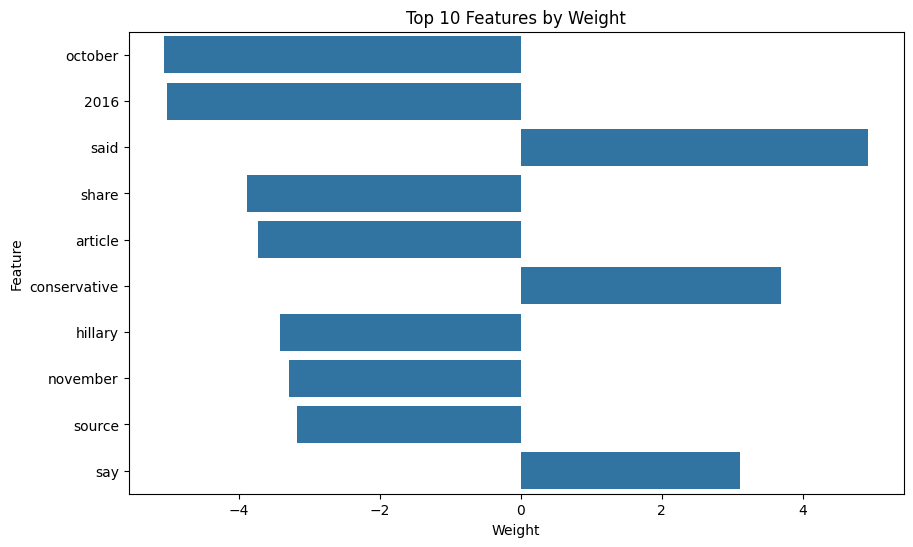

In [ ]:
# Extract feature importance
feature_weights = pac.coef_[0]
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Weight': feature_weights
})

# Sort by absolute weight
feature_importance['AbsoluteWeight'] = feature_importance['Weight'].abs()
top_features = feature_importance.sort_values(by='AbsoluteWeight', ascending=False).head(10)

print("\nTop 10 Features by Weight:")
print(top_features[['Feature', 'Weight']])

# Visualize top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Weight', y='Feature', data=top_features)
plt.title("Top 10 Features by Weight")
plt.xlabel("Weight")
plt.ylabel("Feature")
plt.show()


This table shows the top 10 features (like words or identifiers) and their associated weights. The weight indicates how important or influential each feature is in the model.

- **Positive weights** (e.g., "said" with a weight of 4.93) mean the feature has a strong positive impact on the model's outcome.
- **Negative weights** (e.g., "october" with a weight of -5.06) suggest the feature has a negative impact.

The larger the absolute value of the weight, the more important the feature is in the model.

Cross-Validation before Improvement

In [ ]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(pac, tfidf_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores)*100:.2f}% (+/- {np.std(cv_scores)*100:.2f}%)")


Cross-Validation Accuracy: 93.49% (+/- 0.79%)


###Interpretation:
High Accuracy: The model demonstrates strong performance in differentiating between fake and real news, achieving an average cross-validation accuracy close to 94%.

Consistency: The low standard deviation (±0.87%) indicates that the model maintains consistent performance across different data splits, showcasing its stability and reliability in classification tasks.

Improvement of Model

I aim to apply **sentiment analysis**, as fake news often uses emotionally charged and subjective language to influence readers. By incorporating sentiment polarity (positivity/negativity) and subjectivity (objective vs. opinion-based) as additional features, the model can better distinguish between fake and real news. This enhancement is expected to capture the emotional tone and bias present in the text, which are common indicators of fake news.

In [ ]:
from textblob import TextBlob

# Function to extract sentiment (polarity and subjectivity)
def extract_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply the sentiment extraction on the train data
x_train_sentiment = x_train.apply(lambda text: pd.Series(extract_sentiment(text)))
x_train_sentiment.columns = ['polarity', 'subjectivity']  # Naming the columns for sentiment features

# Apply the sentiment extraction on the test data
x_test_sentiment = x_test.apply(lambda text: pd.Series(extract_sentiment(text)))
x_test_sentiment.columns = ['polarity', 'subjectivity']  # Naming the columns for sentiment features


from scipy.sparse import hstack

# Concatenating the sentiment features with TF-IDF features
x_train_combined = hstack([tfidf_train, x_train_sentiment.values])
x_test_combined = hstack([tfidf_test, x_test_sentiment.values])

pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(x_train_combined, y_train)

y_pred_pac = pac.predict(x_test_combined)
score = accuracy_score(y_test,y_pred_pac)
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(y_test,y_pred_pac, labels=['FAKE','REAL'])



Accuracy: 93.21%


array([[586,  42],
       [ 44, 595]])

Lets apply HyperParameter tuning to fine-tune the model

In [ ]:
# Hyperparameter Tuning with GridSearchCV (for TfidfVectorizer with PassiveAggressiveClassifier)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [100, 500, 1000],
    'C': [0.1, 1, 10],
    'tol': [1e-3, 1e-4, 1e-5]
}

grid_search = GridSearchCV(pac, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_combined, y_train)

# Get the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 10, 'max_iter': 100, 'tol': 0.0001}
Best score: 0.9354788148546218


In [ ]:
best_pac = grid_search.best_estimator_
# Evaluate the model with the best parameters
y_pred_best_pac = best_pac.predict(x_test_combined)
score = accuracy_score(y_test, y_pred_best_pac)
print(f'Accuracy (with best parameters): {round(score*100,2)}%')

Accuracy (with best parameters): 93.21%


Cross-Validation after Hyperparamter tuning and improvement

In [ ]:
cv_scores = cross_val_score(pac, tfidf_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores)*100:.2f}% (+/- {np.std(cv_scores)*100:.2f}%)")


Cross-Validation Accuracy: 93.33% (+/- 0.86%)


Although the model's accuracy has increased by only a small amount, it is still the most accurate model amongst the four